# Ridge regression

by: Andrés M. Castillo

In this notebook we implement the kernel ridge regression algorithm. In the first part we will use the primal and dual solution to make linear regression. Then we will try to use both solutions 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Generate a syntetic dataset. y = 3 * x + 1 with some random noise.

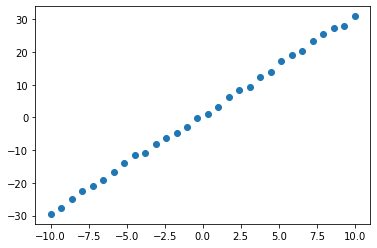

In [72]:
l = 30
X = np.linspace(-10,10, l);
y = 3 * X + 1 + np.random.uniform(-1, 1, l);
X = np.asarray([[row] for row in x]) #Reshape 
plt.scatter(X,y)

plt.show()

## Primal solution

This is the solution to the primal problem. In this case we obtain a w matrix of dimensionality nxn, where n is the number of attributes of input data.

In [73]:
def ridgeTrainPrimal(x, y, alpha):
    n, m = X.shape
    I = np.identity(m)
    C = np.dot(X.T, X);
    w = np.dot(np.dot(np.linalg.inv(C + alpha * I), X.T), y)
    return w

def predictPrimal(w, x):
    return w*X

making a prediction is just to multiply w by X

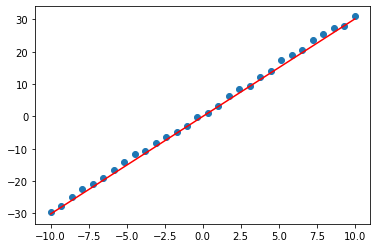

In [74]:
w = ridgeTrainPrimal(X, y, 1)
plt.scatter(X, y)
plt.plot(X, predictPrimal(w, X), c='red')
plt.show()

## Dual solution

This is the solution to de dual problem. In this case, we obtain alpha, a vector of weigths for each example of the data set.

In [75]:
# Linear kernel
def k(a, b):
    G = np.dot(a, b.T)
    return G

def ridgeTrainDual(X, y, k, alpha):
    n, m = X.shape
    I = np.identity(n)
    G = k(X, X)
    #K2 = np.multiply(K,K) + 1
    a = np.dot(y.T, np.linalg.inv(G + alpha * I))
    return a

def predictDual(a, X, x, k):
    kXi = k(X, x)
    return np.dot(a, kXi);

making a prediction in the dual solution requires to calculate the kernel function of the input agains every training example.

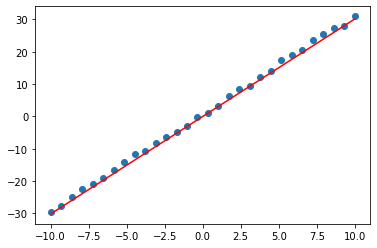

In [76]:
a = ridgeTrainDual(X, y, k, 1)
plt.scatter(X, y)
plt.plot(X, predictDual(a, X, X, k), c='red')
plt.show()

# Cuadratic regression

Now lets change the relation between input and outputs. Lets define y to be a cuadratic function of x, and see what happens with primal and dual solutions

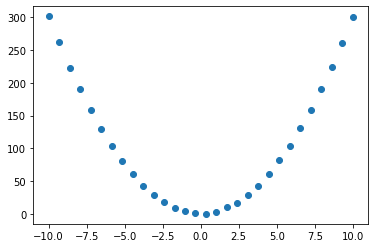

In [77]:
l = 30
X = np.linspace(-10,10, l);
y = 3 * X * X + 1 + np.random.uniform(-1, 1, l);
X = np.asarray([[row] for row in x]) #Reshape 
plt.scatter(X,y)

plt.show()

Lets try with the primal approach

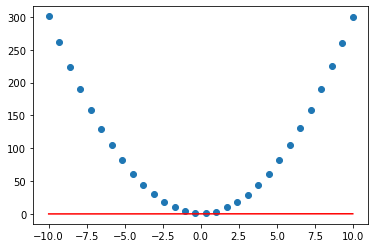

In [78]:
w = ridgeTrainPrimal(X, y, 1)
plt.scatter(X, y)
plt.plot(X, predictPrimal(w, X), c='red')
plt.show()

We can see how it fails.

Now lets try with the dual solution

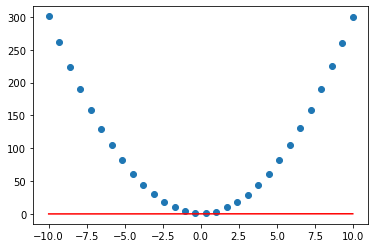

In [81]:
a = ridgeTrainDual(X, y, k, 1)
plt.scatter(X, y)
plt.plot(X, predictDual(a, X, X, k), c='red')
plt.show()

Ops. Nothing better. But wait. What if we change the kernel function a little

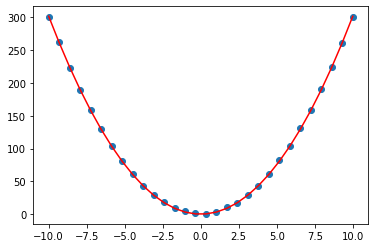

In [84]:
# Cuadratic kernel
def k2(a, b):
    G = np.dot(a, b.T)
    return np.multiply(G, G)

a = ridgeTrainDual(X, y, k2, 1)
plt.scatter(X, y)
plt.plot(X, predictDual(a, X, X, k2), c='red')
plt.show()

Very interesting. We can perform cuadratic regresion just by changing our kernel funcion. 


## Challenge / Assingment

Propose a kernel that can fit the following data:

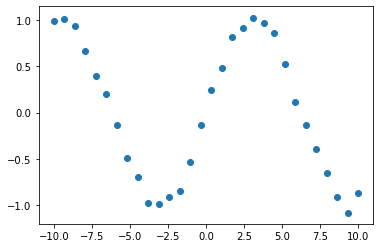

In [90]:
l = 30
X = np.linspace(-5,5, l);
y = np.sin(X)  + np.random.uniform(-0.1, 0.1, l);
X = np.asarray([[row] for row in x]) #Reshape 
plt.scatter(X,y)

plt.show()